In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import nibabel as nib

from google.colab import drive
drive.mount('/content/drive')

# Build the complete path to the folder desiderated
#main_folder_path = '/content/drive/MyDrive/video_recognition_proj/data/CAMUS_public'

Mounted at /content/drive


In [ ]:


pow = np.linspace(0,5,48)
kweight = np.power(2, pow)

print(len(pow))

48


In [ ]:
import torch
size = 36
print("Using U shape kspace")
kspace_mask = torch.zeros((size,size,size))
mag = np.linspace(0,5,size//2)
kweight = np.power(2, mag)
for half_size in range(0, size//2):
    if half_size ==size:
        value = kweight[half_size]/2
    else:
        value = kweight[half_size]

Using U shape kspace


In [ ]:
value

32.0

174.1531663071194 0.020348432507781455


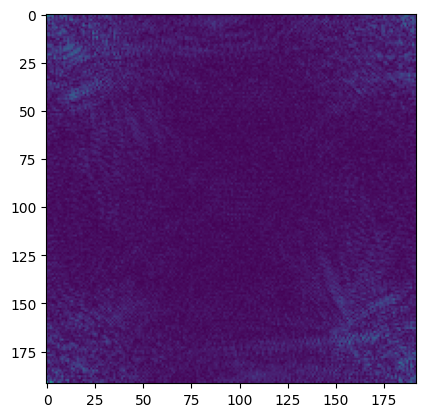

In [ ]:
# 學習這個toolkit: https://github.com/v0lta/PyTorch-Wavelet-Toolbox

# nii_image = nib.load("/content/drive/MyDrive/clean_code/nifti_convert/res0726/rexp31/rexp31_KR.nii.gz")
# volume = nii_image.get_fdata()

# kspace_volume = np.abs(np.fft.fftn(volume))
kspace_data = kspace_volume[95,:,:]
print(kspace_data.max(), kspace_data.min())

plt.imshow(kspace_data)

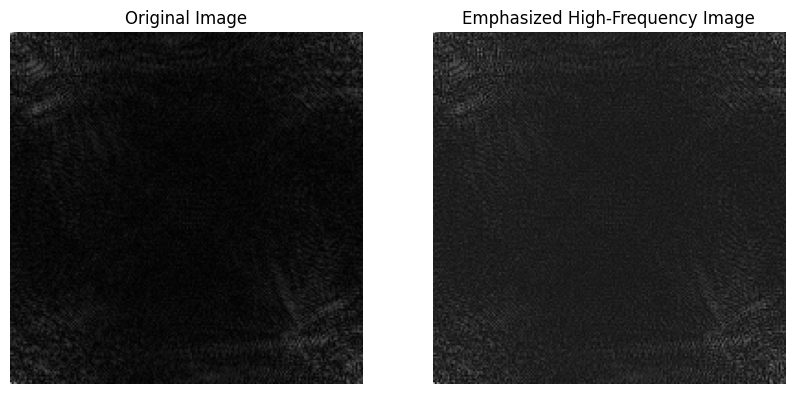

In [ ]:
import numpy as np
from scipy import misc
import pywt
import matplotlib.pyplot as plt

# Load the face image from scipy.misc (you can also use other images)
#face = misc.face(gray=True)

# Apply Haar wavelet transform
coeffs = pywt.dwt2(kspace_data, 'haar')

# Extract approximation (low-frequency) and detail (high-frequency) coefficients
cA, (cH, cV, cD) = coeffs

# Modify the detail coefficients to emphasize high-frequency components
# You can adjust the scaling factor to control the emphasis
scaling_factor = 2.0
cH = cH * scaling_factor
cV = cV * scaling_factor
cD = cD * scaling_factor

# Reconstruct the emphasized image using the modified coefficients
new_coeffs = (cA, (cH, cV, cD))
emphasized_image = pywt.idwt2(new_coeffs, 'haar')

# Display the original and emphasized images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(kspace_data, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(122)
plt.imshow(np.clip(0,255,emphasized_image), cmap='gray')
plt.title("Emphasized High-Frequency Image")
plt.axis('off')

plt.show()

(array([2.2000e+01, 3.5100e+02, 7.9420e+03, 1.5291e+04, 8.1380e+03,
        3.0290e+03, 1.1210e+03, 5.6000e+02, 2.2300e+02, 1.0200e+02,
        5.5000e+01, 1.7000e+01, 5.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-23.98328565, -15.25141528,  -6.5195449 ,   2.21232547,
         10.94419584,  19.67606621,  28.40793658,  37.13980695,
         45.87167732,  54.60354769,  63.33541806,  72.06728843,
         80.7991588 ,  89.53102917,  98.26289954, 106.99476992,
        115.72664029, 124.45851066, 133.19038103, 141.9222514 ,
        150.65412177, 159.38599214, 168.11786251, 176.84973288,
        185.58160325, 194.31347362, 203.04534399, 211.77721436,
        220.50908474, 229.24095511, 237.97282548]),
 <BarContainer object of 30 artists>)

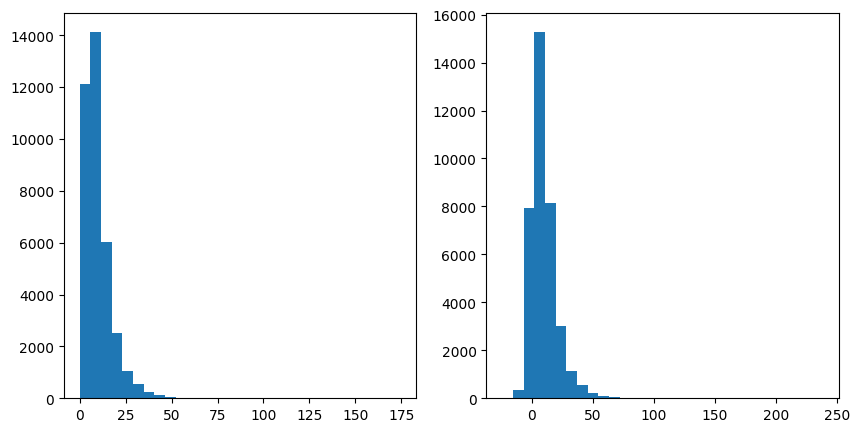

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(kspace_data.ravel(), bins=30)

plt.subplot(122)
plt.hist(emphasized_image.ravel(), bins=30)

In [ ]:
# Apply Haar wavelet transform in 3D
coeffs = pywt.wavedecn(kspace_volume, 'haar', level=2)

# Extract approximation (low-frequency) and detail (high-frequency) coefficients
cA, cD = coeffs[0], coeffs[1:]

# Modify the detail coefficients to emphasize high-frequency components
# You can adjust the scaling factor to control the emphasis
scaling_factor = 2.0
modified_coeffs = [(cA,)]

for level_coeffs in cD:
    modified_level = []
    for detail_coeff in level_coeffs:
        modified_level.append(detail_coeff * scaling_factor)
    modified_coeffs.append(tuple(modified_level))

# Reconstruct the emphasized image using the modified coefficients
emphasized_image = pywt.waverecn(modified_coeffs, 'haar')

TypeError: ignored

In [ ]:
for level_coeffs in cD:
    print(level_coeffs.keys())

dict_keys(['aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])
dict_keys(['aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])


In [ ]:
import pywt

# Apply Haar wavelet transform in 3D
coeffs = pywt.wavedecn(kspace_volume, 'haar', level=2)

# Extract the coefficients and filter order strings
coeffs, filter_strings = coeffs[0], coeffs[1]


In [ ]:
filter_strings.keys()

dict_keys(['aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])

In [ ]:

# Modify the detail coefficients to emphasize high-frequency components
# You can adjust the scaling factor to control the emphasis
scaling_factor = 2.0

for i in range(len(filter_strings)):
    if filter_strings[i] == "d":  # High-pass filter
        coeffs[i] = coeffs[i] * scaling_factor

# Reconstruct the emphasized image using the modified coefficients
emphasized_image = pywt.waverecn([coeffs, filter_strings], 'haar')


KeyError: ignored

In [ ]:
coeffs[0].shape

(48, 48, 48)

In [ ]:
coeffs[1].keys()

dict_keys(['aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])

In [ ]:
coeffs[2].keys()

dict_keys(['aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd'])